<a href="https://colab.research.google.com/github/Ykomash/ML_Projects/blob/main/Cirrhosis_Patient_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Raw_df = pd.read_csv("/content/cirrhosis.csv")
Raw_df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


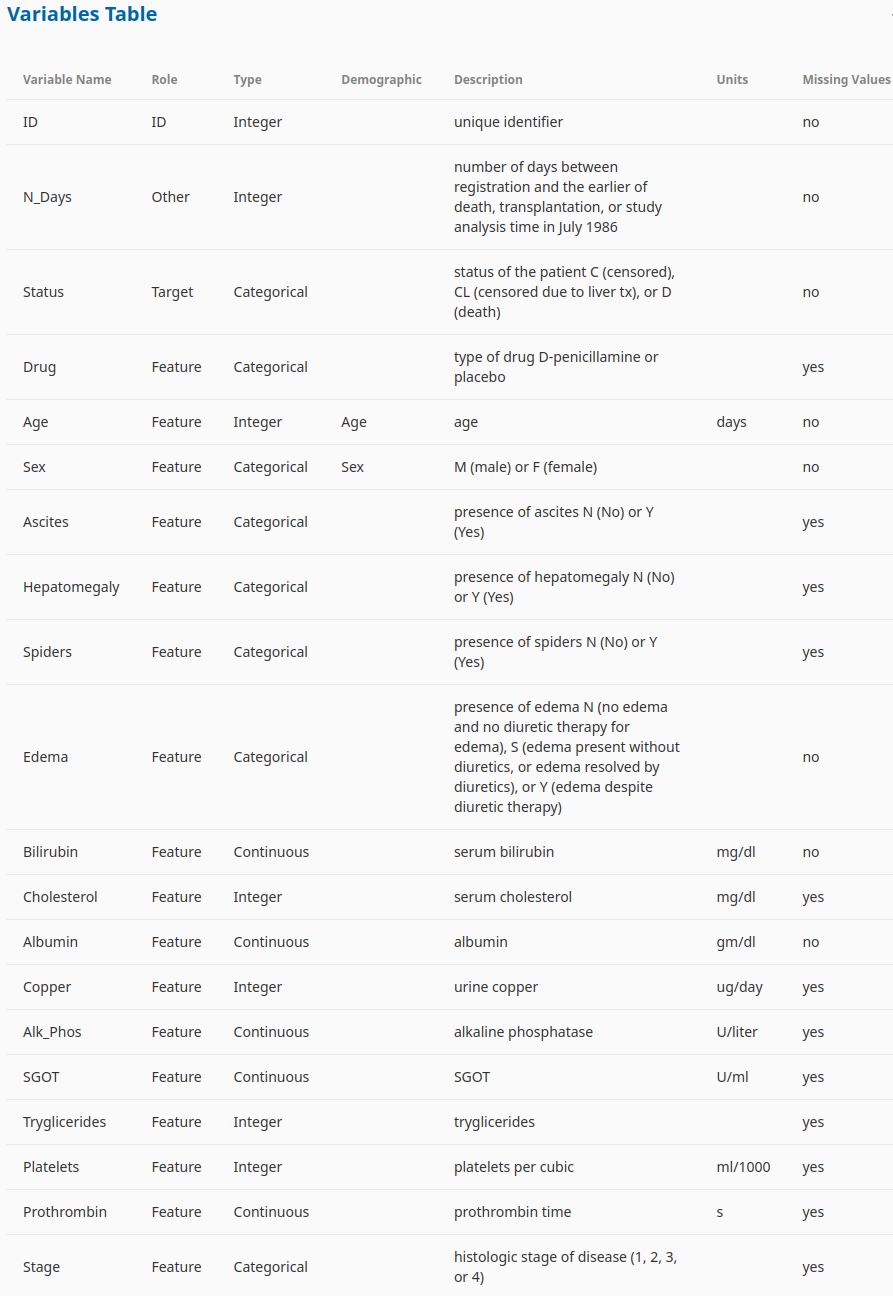

In [ ]:
Raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Raw_df is your DataFrame

for column in Raw_df.select_dtypes(include=["object"]).columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=Raw_df[column].dropna(), bins=20)  # Drop null values before plotting
    plt.title(f"Histogram of {column}")
    plt.show()


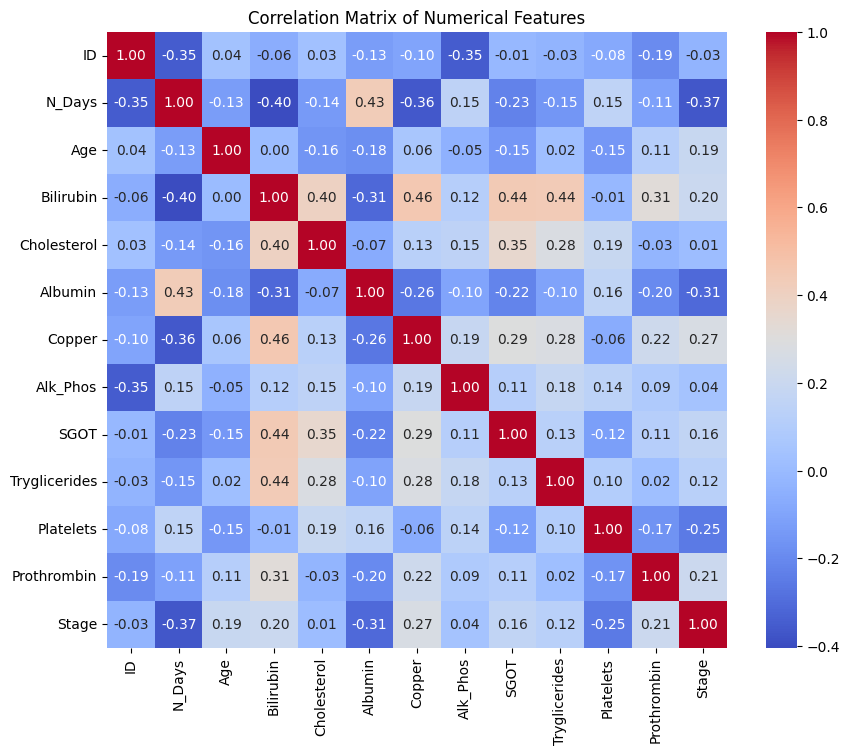

In [ ]:
# prompt: show corr matrix for all the numericals

corr_matrix = Raw_df.select_dtypes(include=["int64", "float64"]).corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


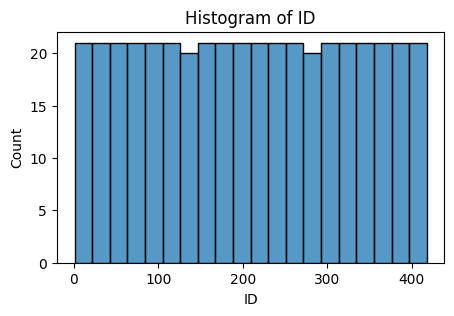

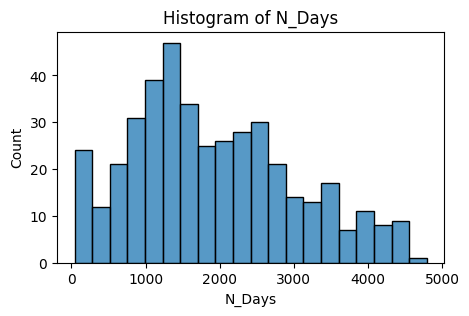

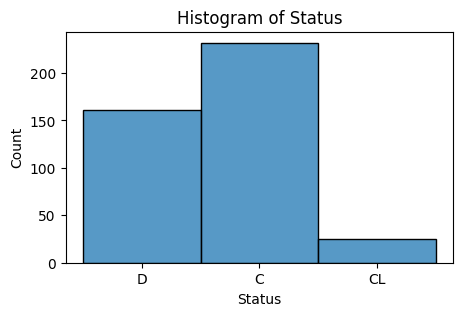

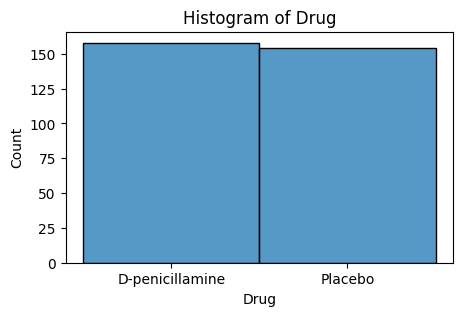

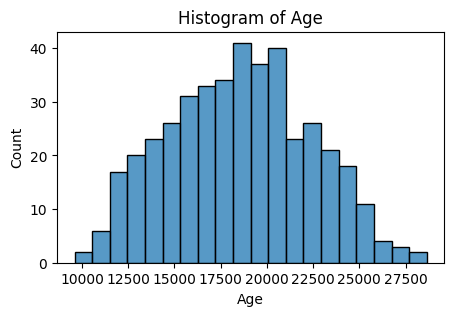

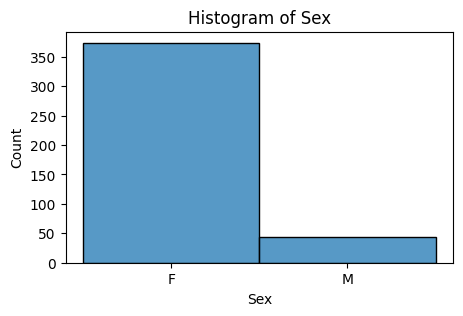

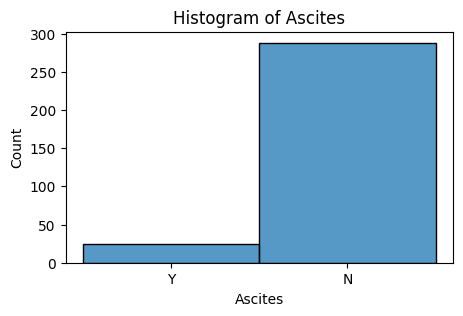

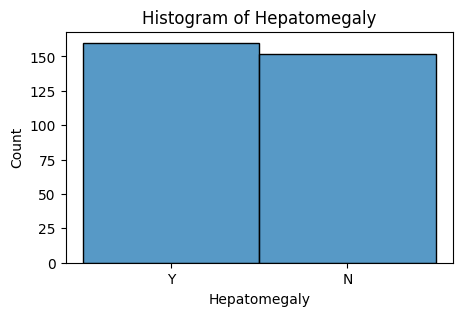

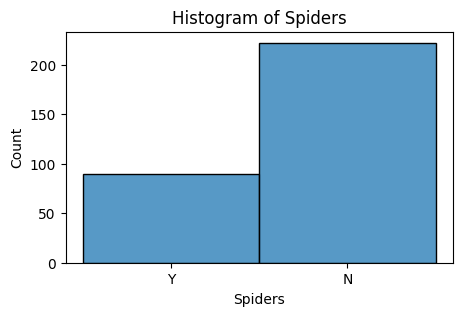

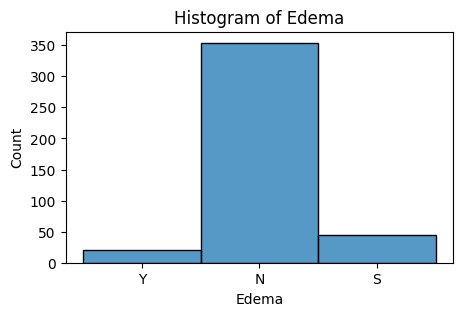

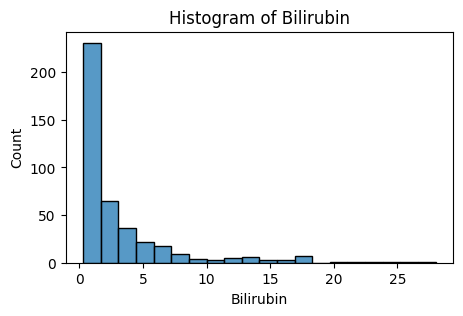

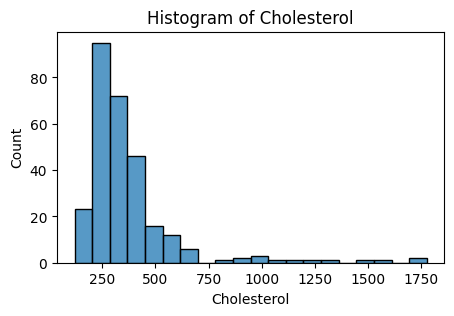

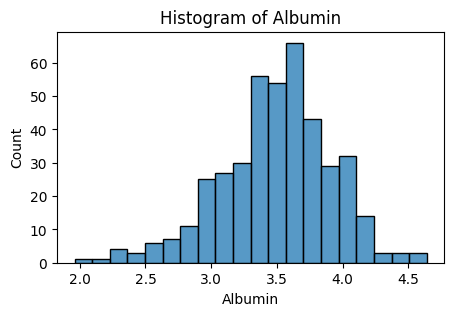

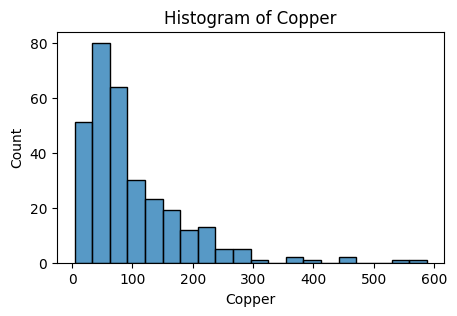

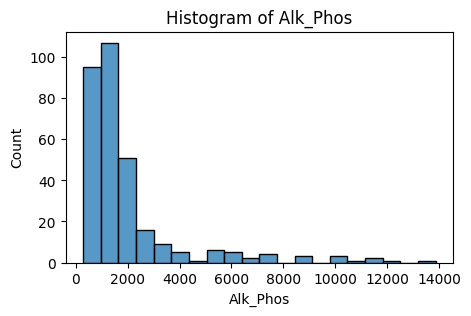

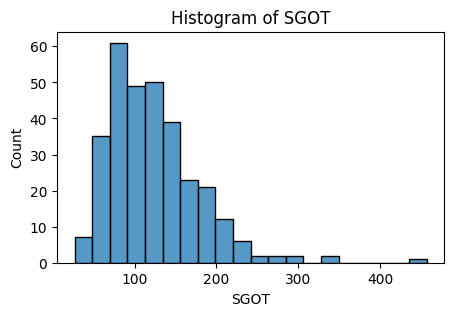

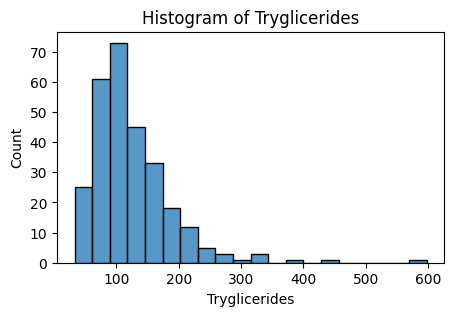

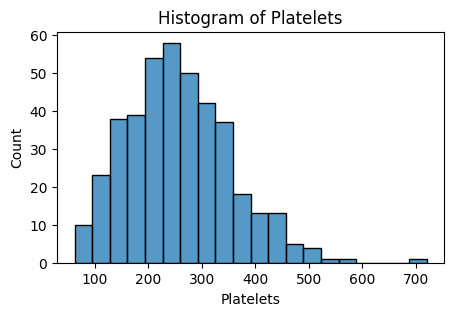

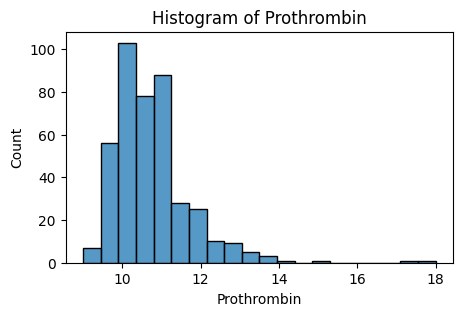

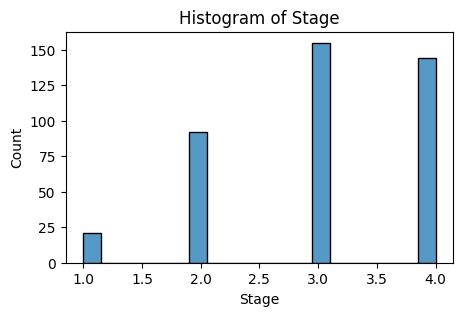

In [ ]:
# prompt: show hist for all colmos

for column in Raw_df.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=Raw_df[column].dropna(), bins=20)  # Drop null values before plotting
    plt.title(f"Histogram of {column}")
    plt.show()


In [ ]:
Raw_df["Status"].value_counts()

C     232
D     161
CL     25
Name: Status, dtype: int64

In [ ]:
drop_df = Raw_df.dropna(subset=["Drug"])
drop_df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [ ]:
drop_df.describe().style.format("{:.2f}")
drop_df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,312.000000,312.000000,312.000000,312.000000,284.000000,312.000000,310.000000,312.000000,312.000000,282.000000,308.000000,312.000000,312.000000
mean,156.500000,2006.362179,18269.442308,3.256090,369.510563,3.520000,97.648387,1982.655769,122.556346,124.702128,261.935065,10.725641,3.032051
std,90.210864,1123.280843,3864.805407,4.530315,231.944545,0.419892,85.613920,2140.388824,56.699525,65.148639,95.608742,1.004323,0.877880
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,78.750000,1191.000000,15427.750000,0.800000,249.500000,3.310000,41.250000,871.500000,80.600000,84.250000,199.750000,10.000000,2.000000
50%,156.500000,1839.500000,18187.500000,1.350000,309.500000,3.550000,73.000000,1259.000000,114.700000,108.000000,257.000000,10.600000,3.000000
75%,234.250000,2697.250000,20715.000000,3.425000,400.000000,3.800000,123.000000,1980.000000,151.900000,151.000000,322.500000,11.100000,4.000000
max,312.000000,4556.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


In [ ]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             312 non-null    int64  
 1   N_Days         312 non-null    int64  
 2   Status         312 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            312 non-null    int64  
 5   Sex            312 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          312 non-null    object 
 10  Bilirubin      312 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        312 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      308 non-null    float64
 18  Prothrombi

In [ ]:
drop_df[drop_df["Cholesterol"].isna()]

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
13,14,1217,D,Placebo,20535,M,Y,Y,N,Y,0.8,NaN,2.27,43.0,728.0,71.00,NaN,156.0,11.0,4.0
39,40,4467,C,D-penicillamine,17046,F,N,N,N,N,1.3,NaN,3.34,105.0,11046.6,104.49,NaN,358.0,11.0,4.0
40,41,1350,D,D-penicillamine,12285,F,N,Y,N,N,6.8,NaN,3.26,96.0,1215.0,151.90,NaN,226.0,11.7,4.0
41,42,4453,C,Placebo,12307,F,N,Y,Y,N,2.1,NaN,3.54,122.0,8778.0,56.76,NaN,344.0,11.0,4.0
44,45,4025,C,Placebo,15265,F,N,N,N,N,0.6,NaN,3.93,19.0,1826.0,71.30,NaN,474.0,10.9,2.0
48,49,708,D,Placebo,22336,F,N,Y,N,N,0.8,NaN,3.82,58.0,678.0,97.65,NaN,233.0,11.0,4.0
52,53,1000,D,D-penicillamine,24621,F,N,Y,N,N,2.6,NaN,3.10,94.0,6456.2,56.76,NaN,214.0,11.0,4.0
69,70,3458,C,D-penicillamine,20600,F,N,N,N,N,0.6,NaN,4.64,20.0,666.0,54.25,NaN,265.0,10.6,2.0
94,95,130,D,Placebo,16944,F,Y,Y,Y,Y,17.4,NaN,2.64,182.0,559.0,119.35,NaN,401.0,11.7,2.0
95,96,3850,C,D-penicillamine,17841,F,N,N,N,N,1.0,NaN,3.70,33.0,1258.0,99.20,NaN,338.0,10.4,3.0


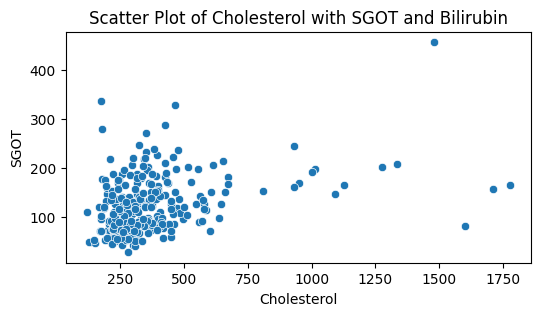

In [ ]:
# prompt: scater plot of Cholesterol with SGOT and Bilirubin

plt.figure(figsize=(6, 3))
sns.scatterplot(data=drop_df, x="Cholesterol", y="SGOT")
plt.title("Scatter Plot of Cholesterol with SGOT and Bilirubin")
plt.show()


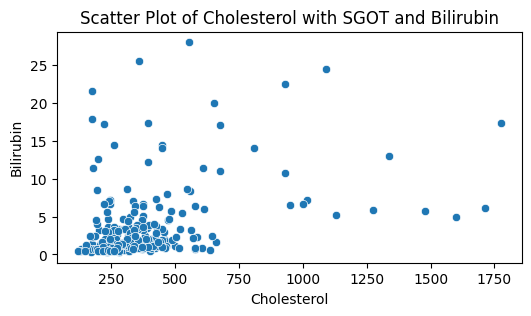

In [ ]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data=drop_df, x="Cholesterol", y="Bilirubin")
plt.title("Scatter Plot of Cholesterol with SGOT and Bilirubin")
plt.show()